# Homework 1 - Ishan Dane
## Github: https://github.com/idane2309

In [163]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [164]:
## define data
X = np.arange(0,31)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

Fit the following model to the data with least-squares error 


## i) Write a code to find the minimum error and determine the parameters A, B, C, D

2.1716818723637914 cos 0.9093249029166655 x  + 0.7324784894461773x + 31.45291849616531
A = 2.1716818723637914
B = 0.9093249029166655
C = 0.7324784894461773
D = 31.45291849616531


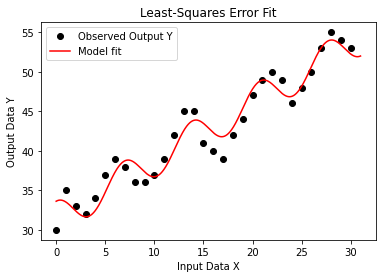

Min error: 1.592725853040056


In [224]:
## define objective function
def velfit (c, x, y):
    e2 = np.sqrt(np.sum((c[0] * np.cos(c[1] * x) + c[2] * x + c[3] - y)**2)/ len(y))
    return e2

## set initial guess for parameters
v0 = np.array([3, 1*np.pi/4, 2/3, 32])


## perform optimization
res = opt.minimize(velfit, v0, args=(X, Y), method='Nelder-Mead')

c = res.x

## parameters for minimum error A, B, C, D
print(str(c[0]) + ' cos ' + str(c[1]) + ' x ' + ' + ' + str(c[2]) + 'x ' + '+ ' + str(c[3]))
print('A = ' + str(c[0]))
print('B = ' + str(c[1]))
print('C = ' + str(c[2]))
print('D = ' + str(c[3]))

x2 = np.arange(0, 31.01, 0.01)
yfit2 = (c[0]*np.cos(c[1]*x2)+c[2]*x2+c[3])

plt.title('Least-Squares Error Fit')
plt.xlabel('Input Data X')
plt.ylabel('Output Data Y')
plt.plot(np.arange(0, 31), Y, 'ko', label = 'Observed Output Y')
plt.plot(x2, yfit2, 'r-', label='Model fit')
plt.legend()
plt.show()

min_error = velfit(c, X, Y)
print('Min error: ' + str(min_error))


## ii) With the results of (i), fix two of the parameters and sweep through values of the other two parameters to generate a 2D loss (error) landscape


/var/folders/33/x99lf2957qnbskhfrkjg00dc0000gn/T/ipykernel_6277/105388221.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(C_values, D_values, error)


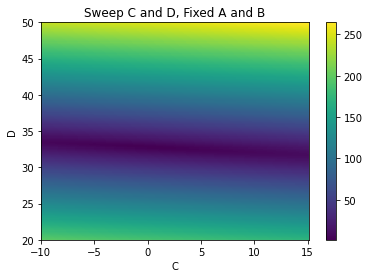

/var/folders/33/x99lf2957qnbskhfrkjg00dc0000gn/T/ipykernel_6277/105388221.py:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(A_values, B_values, error2)


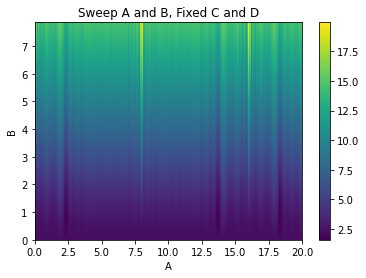

/var/folders/33/x99lf2957qnbskhfrkjg00dc0000gn/T/ipykernel_6277/105388221.py:55: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(B_values, C_values, error3)


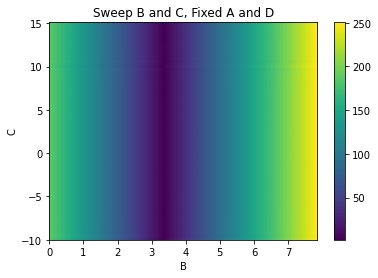

/var/folders/33/x99lf2957qnbskhfrkjg00dc0000gn/T/ipykernel_6277/105388221.py:71: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(A_values, D_values, error4)


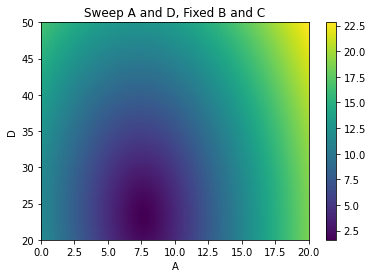

/var/folders/33/x99lf2957qnbskhfrkjg00dc0000gn/T/ipykernel_6277/105388221.py:87: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(B_values, D_values, error5)


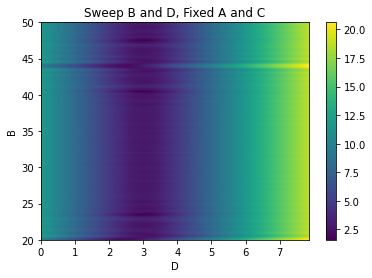

/var/folders/33/x99lf2957qnbskhfrkjg00dc0000gn/T/ipykernel_6277/105388221.py:103: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(A_values, C_values, error6)


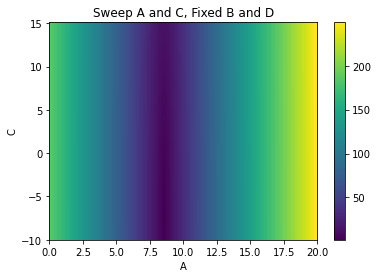

In [231]:
## parameter sweep

# parameters sweep grid values np.linspace(start, end, num = 50)
A_values = np.linspace(0, 20, 200)
B_values = np.linspace(0, 10 * np.pi/4, 200)
C_values = np.linspace(-10, 15.1, 200)
D_values = np.linspace(20, 50, 200)

A = c[0]
B = c[1]
C = c[2]
D = c[3]

# 1. Fix A, B sweep C, D
# initlaize 2D array to keep hold of error values
error = np.zeros((len(C_values), len(D_values)))
# calculate the error point for each grid value
for i in range(0, len(C_values)): 
    for j in range(0, len(D_values)):
        params = [A, B, C_values[i], D_values[j]]
        error[i, j] = velfit(params, X, Y)           
# 2D loss landscape
plt.pcolor(C_values, D_values, error)
plt.colorbar()
plt.title('Sweep C and D, Fixed A and B')
plt.xlabel('C')
plt.ylabel('D')
plt.show()

# 2. Fix C, D sweep A, B
# initlaize 2D array to keep hold of error values
error2 = np.zeros((len(A_values), len(B_values)))
# calculate the error point for each grid value
for i in range(0, len(A_values)): 
    for j in range(0, len(B_values)):
        params2 = [A_values[i], B_values[j], C, D]
        error2[i, j] = velfit(params2, X, Y)       
# 2D loss landscape
plt.pcolor(A_values, B_values, error2)
plt.colorbar()
plt.title('Sweep A and B, Fixed C and D')
plt.xlabel('A')
plt.ylabel('B')
plt.show()

# 3. Fix A, D sweep B, C
# initlaize 2D array to keep hold of error values
error3 = np.zeros((len(B_values), len(C_values)))
# calculate the error point for each grid value
for i in range(0, len(B_values)): 
    for j in range(0, len(C_values)):
        params3 = [A, B_values[i], C_values[j], D]
        error3[i, j] = velfit(params3, X, Y)        
# 2D loss landscape
plt.pcolor(B_values, C_values, error3)
plt.colorbar()
plt.title('Sweep B and C, Fixed A and D')
plt.xlabel('B')
plt.ylabel('C')
plt.show()

# 4. Fix B, C sweep A, D
# initlaize 2D array to keep hold of error values
error4 = np.zeros((len(A_values), len(D_values)))
# calculate the error point for each grid value
for i in range(0, len(A_values)): 
    for j in range(0, len(D_values)):
        params4 = [A_values[i], B, C, D_values[j]]
        error4[i, j] = velfit(params4, X, Y)      
# 2D loss landscape
plt.pcolor(A_values, D_values, error4)
plt.colorbar()
plt.title('Sweep A and D, Fixed B and C')
plt.xlabel('A')
plt.ylabel('D')
plt.show()

# 5. Fix A, C sweep B, D
# initlaize 2D array to keep hold of error values
error5 = np.zeros((len(B_values), len(D_values)))
# calculate the error point for each grid value
for i in range(0, len(B_values)): 
    for j in range(0, len(D_values)):
        params5 = [A, B_values[i], C, D_values[j]]
        error5[i, j] = velfit(params5, X, Y)       
# 2D loss landscape
plt.pcolor(B_values, D_values, error5)
plt.colorbar()
plt.title('Sweep B and D, Fixed A and C')
plt.xlabel('D')
plt.ylabel('B')
plt.show()

# 6. Fix B, D sweep A, C
# initlaize 2D array to keep hold of error values
error6 = np.zeros((len(A_values), len(C_values)))
# calculate the error point for each grid value
for i in range(0, len(A_values)): 
    for j in range(0, len(C_values)):
        params6 = [A_values[i], B, C_values[j], D]
        error6[i, j] = velfit(params6, X, Y)        
# 2D loss landscape
plt.pcolor(A_values, C_values, error6)
plt.colorbar()
plt.title('Sweep A and C, Fixed B and D')
plt.xlabel('A')
plt.ylabel('C')
plt.show()

## iii) Using the first 20 data points as training data, fit a line, parabola and 19th degree polynomial to the data. Compute the least-square error for each of these over the training points. Then compute the least square error of these models on the test data which are the remaining 10 data points

In [276]:
# Training Data
X_train = X[:20]
Y_train = Y[:20]
# Testing Data
X_test = X[20:]
Y_test = Y[20:]

# Model Fitting
line_fit = np.polyfit(X_train, Y_train, 1)
parab_fit = np.polyfit(X_train, Y_train, 2)
poly_fit = np.polyfit(X_train, Y_train, 19)

print(line_fit)
print(parab_fit)
print(poly_fit)

def line_fit_loss(c, x, y):
    line_e = np.sqrt(np.sum((c[0] * x + c[1] - y)**2) / len(y))
    return line_e

def parab_fit_loss(c, x, y):
    parab_e = np.sqrt(np.sum((np.polyval(c, x) - y)**2) / len(y))
    return parab_e

def poly_fit_loss(c, x, y):
    poly_e = np.sqrt(np.sum((np.polyval(c, x) - y)**2) / len(y))
    return poly_e

line_fit_e = line_fit_loss(line_fit, X_train, Y_train)
parab_fit_e = parab_fit_loss(parab_fit, X_train, Y_train)
poly_fit_e = poly_fit_loss(poly_fit, X_train, Y_train)

print('Training Line fit error: ' + str(line_fit_e))
print('Training Parabola fit error: ' + str(parab_fit_e))
print('Training Polynomial fit error: ' + str(poly_fit_e))

## Test Data
line_fit_e2 = line_fit_loss(line_fit, X_test, Y_test)
parab_fit_e2 = parab_fit_loss(parab_fit, X_test, Y_test)
poly_fit_e2 = poly_fit_loss(poly_fit, X_test, Y_test)

print('Test Line fit error: ' + str(line_fit_e2))
print('Test Parabola fit error: ' + str(parab_fit_e2))
print('Test Polynomial fit error: ' + str(poly_fit_e2))


[ 0.60150376 32.48571429]
[-2.41512873e-02  1.06037822e+00  3.11090909e+01]
[-7.64532724e-15  1.11417679e-12 -7.14564487e-11  2.59310252e-09
 -5.51480356e-08  5.33270370e-07  5.63354587e-06 -3.00795379e-04
  5.70682773e-03 -6.86619910e-02  5.79806744e-01 -3.53806556e+00
  1.56368577e+01 -4.93193960e+01  1.07585428e+02 -1.54080370e+02
  1.34299065e+02 -6.65158339e+01  2.04158319e+01  2.99999506e+01]
Training Line fit error: 2.242749386808538
Training Parabola fit error: 2.1255393482773766
Training Polynomial fit error: 0.028351503968806435
Test Line fit error: 3.36363873604787
Test Parabola fit error: 8.713651781874919
Test Polynomial fit error: 28617752784.428474


/Users/idane/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


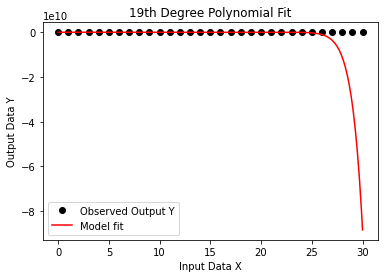

In [275]:
x4 = np.arange(0, 30.1, 0.1)
yfit4 = np.polyval(poly_fit, x4)

plt.title('19th Degree Polynomial Fit')
plt.xlabel('Input Data X')
plt.ylabel('Output Data Y')
plt.plot(np.arange(0, 31), Y, 'ko', label = 'Observed Output Y')
plt.plot(x4, yfit4, 'r-', label='Model fit')
plt.legend()
plt.show()

# iv) Repeat (iii) but use the first 10 and last 10 data points as training data. Then fit the model to the test data (which are the 10 held out middle data points). Compare these results to (iii)


In [277]:
# Training Data
X_train = np.concatenate((X[:10], X[-10:]))
Y_train = np.concatenate((Y[:10], Y[-10:]))
# Test Data
X_test = X[10:21]
Y_test = Y[10:21]


line_fit2 = np.polyfit(X_train, Y_train, 1)
parab_fit2 = np.polyfit(X_train, Y_train, 2)
poly_fit2 = np.polyfit(X_train, Y_train, 19)

print(line_fit2)
print(parab_fit2)
print(poly_fit2)

line_fit_e3 = line_fit_loss(line_fit2, X_train, Y_train)
parab_fit_e3 = parab_fit_loss(parab_fit2, X_train, Y_train)
poly_fit_e3 = poly_fit_loss(poly_fit2, X_train, Y_train)

print('Training Line fit error: ' + str(line_fit_e3))
print('Training Parabola fit error: ' + str(parab_fit_e3))
print('Training Polynomial fit error: ' + str(poly_fit_e3))

## Test Data
line_fit_e4 = line_fit_loss(line_fit2, X_test, Y_test)
parab_fit_e4 = parab_fit_loss(parab_fit2, X_test, Y_test)
poly_fit_e4 = poly_fit_loss(poly_fit2, X_test, Y_test)

print('Test Line fit error: ' + str(line_fit_e4))
print('Test Parabola fit error: ' + str(parab_fit_e4))
print('Test Polynomial fit error: ' + str(poly_fit_e4))

[ 0.74345992 31.69810127]
[9.14373959e-04 7.16028697e-01 3.17954821e+01]
[-1.23935368e-17  2.97886601e-15 -3.13620948e-13  1.85680235e-11
 -6.38037203e-10  9.66353415e-09  1.88645528e-07 -1.50845329e-05
  4.48330953e-04 -8.43368399e-03  1.10770076e-01 -1.04684753e+00
  7.15806967e+00 -3.50994936e+01  1.20773369e+02 -2.80911421e+02
  4.15206827e+02 -3.48648851e+02  1.27471284e+02  2.99991572e+01]
Training Line fit error: 1.851669904329375
Training Parabola fit error: 1.8508364115957907
Training Polynomial fit error: 0.1638133765080727
Test Line fit error: 2.8065076975181618
Test Parabola fit error: 2.774982896893291
Test Polynomial fit error: 483.9099124568562


/Users/idane/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


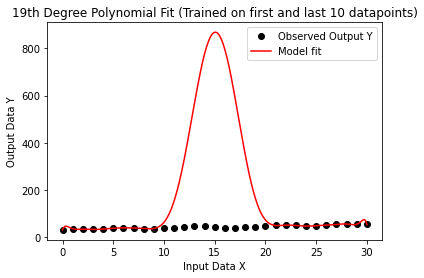

In [253]:
x3 = np.arange(0, 30.1, 0.1)
yfit3 = np.polyval(poly_fit2, x3)

plt.title('19th Degree Polynomial Fit (Trained on first and last 10 datapoints)')
plt.xlabel('Input Data X')
plt.ylabel('Output Data Y')
plt.plot(np.arange(0, 31), Y, 'ko', label = 'Observed Output Y')
plt.plot(x3, yfit3, 'r-', label='Model fit')
plt.legend()
plt.show()